In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



In [17]:
pip install xgboost


The following command must be run outside of the IPython shell:

    $ pip install xgboost

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [18]:

from sklearn.svm import SVC
%matplotlib inline

In [19]:
data=pd.read_csv(r'C:\Users\mjv33\Downloads\bank.csv')

In [20]:
### 1.2 Peek at the training data


In [21]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
full_data.info()


NameError: name 'full_data' is not defined

In [ ]:
print("The training dataset has",data.shape[1],"columns and", data.shape[0],"rows")


In [ ]:
### Overview of responses and overall response rate

In [ ]:
# Calculate number of customers
n_customers = len(data)

# Calculate number of features
n_features = len(data.columns[:-1])

# Calculate reponded customers
n_subscribed = len(data[data['y'] == 'yes'])

# Calculate not responded customers
n_not_subscribed = len(data[data['y'] == 'no'])

# Calculate response rate
response_rate = n_subscribed/(n_customers)*100

# Print the results
print("Total number of customers: {}".format(n_customers))
print("Number of features: {}".format(n_features))
print("Number of customers who subscribed: {}".format(n_subscribed))
print("Number of customers who did not subscribe: {}".format(n_not_subscribed))
print("Response rate of customers: {:.2f}%".format(response_rate))


In [ ]:
display(data.describe())


In [ ]:
### Exploratory Analysis - Data Visualization

In [ ]:
data.columns

In [ ]:
#histogram
h = sns.distplot(data['age'], bins=10, kde=False)
sns.plt.title('Age distribution in the data')
h.figure.set_size_inches(16,6)


In [ ]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(data, col="marital", col_wrap=2, size=5, aspect=1.5)  
g.map(sns.boxplot, "job","duration").set_xticklabels(rotation=30)

In [ ]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(full_data, col="marital", col_wrap=2, size=6, aspect=1.5)
g.map(sns.distplot, "age", bins=10).set_xticklabels(rotation=30)

In [ ]:

#'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
sns.set(font_scale=1.5)
g = sns.pairplot(data[["age", "duration", "marital", "campaign","euribor3m"]], hue="marital", diag_kind="hist", size=4)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
sns.set(font_scale=1.5)
g = sns.PairGrid(data[["age", "duration", "marital", "euribor3m"]], hue="marital", size=5)  
g.map_upper(sns.regplot)  
g.map_lower(sns.residplot)  
g.map_diag(plt.hist)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.5)

In [ ]:
sns.set(font_scale=1.5)
g = sns.JointGrid(x="campaign", y="duration", data=data, size=6)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)

In [ ]:
# visulize correlations of features with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr())
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [ ]:
2. Data Preprocessing/Cleaning


In [ ]:
2.1 Preprocess Feature Columns
In the following section, we will convert columns like profession and marital status to cetegorical variables

In [ ]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

data = preprocess_features(data)
print("Processed feature columns ({} total features):\n{}".format(len(data.columns), list(data.columns)))

In [ ]:
2.2 Identify feature and target columns

In [ ]:
# Extract feature columns
feature_cols = list(data.columns[:-1])

# Extract target column 'responded'
target_col = data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

In [ ]:
### 2.3 Data cleaning/washing

In [ ]:
#Looking at missing values:
X_all.isnull().sum()


In [ ]:
#nr.employed as the most missing values and hence we will drop that
X_all.drop('nr.employed',  axis=1, inplace=True)


In [ ]:
X_all.fillna(X_all.median(), inplace=True)
X_all.describe()

In [ ]:
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

In [ ]:
# Export cleaned data

filename = 'cleaned_X_all.csv'
X_all.to_csv(filename, index=False, encoding='utf-8')
filename = 'cleaned_y_all.csv'
y_all.to_csv(filename, index=False, encoding='utf-8')

In [24]:
# Read cleaned data directly
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

%matplotlib inline

in_file = 'cleaned_X_all.csv'
X_all = pd.read_csv(in_file)
in_file = 'cleaned_y_all.csv'
y_all = pd.read_csv(in_file, squeeze=True, header=None)

In [26]:
validation_size = 0.30
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_all, y_all, stratify = y_all, 
                                                    test_size = validation_size, random_state = 123)
print("Train set 'yes' pct = {:.2f}%".format(100 * (y_train == 1).mean()))
print("Validation  set 'yes' pct = {:.2f}%".format(100 * (y_validation == 1).mean()))

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_validation.shape[0]))

Train set 'yes' pct = 11.27%
Validation  set 'yes' pct = 11.26%
Training set has 28831 samples.
Validation set has 12357 samples.


In [12]:
### Implementing Models:

"""
We will use the following algorithms:

1) Logistic Regression (LR)
2) Classification and Regression Trees (CART)
3) Random Forests (RF)
4) Adaptive Boosting (AB)
5) Extreme Gradient Boosting (XGB)

"""




'\nWe will use the following algorithms:\n\n1) Logistic Regression (LR)\n2) Classification and Regression Trees (CART)\n3) Random Forests (RF)\n4) Adaptive Boosting (AB)\n5) Extreme Gradient Boosting (XGB)\n\n'

In [14]:
!pip install xgboost

In [27]:
# Test to check how XGBoost compares with SKLearn wrapper

from xgboost.sklearn import XGBClassifier
clf = XGBClassifier()
param = clf.get_xgb_params()
clf.fit(X_train, y_train)
preds_sk = clf.predict(X_validation)

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_validation)
bst = xgb.train(param, dtrain)
preds = bst.predict(dvalid).round()

print("Accurary of sklearn wrapper: ",accuracy_score(y_validation, preds_sk))
print("Accuracy of XGBoost library: ",accuracy_score(y_validation, preds.round()))
print("---------------------------------------------")
print("sklearn predictions: ", preds_sk)
print("XGB library predictions: ",preds)

C:\Users\mjv33\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accurary of sklearn wrapper:  0.9184268026219956
Accuracy of XGBoost library:  0.9117099619648782
---------------------------------------------
sklearn predictions:  [1 0 0 ... 0 0 0]
XGB library predictions:  [1. 0. 0. ... 0. 0. 0.]


In [ ]:
### Model Building

In [28]:
scoring = 'accuracy'

#Spot check algorithms
models = []
models.append(('1. LR', LogisticRegression()))
models.append(('2. CART', DecisionTreeClassifier()))
models.append(('3. RF', RandomForestClassifier(n_estimators=100)))
models.append(('4. AB', AdaBoostClassifier(RandomForestClassifier(n_estimators=100), 
                                        algorithm='SAMME',n_estimators=100, learning_rate=1.0)))
models.append(('5. XGB', XGBClassifier()))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 123)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,
                                                cv = kfold, 
                                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\mjv33\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjv33\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjv33\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjv33\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mjv33\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1. LR: 0.909681 (0.005114)
2. CART: 0.889286 (0.006494)
3. RF: 0.912455 (0.007363)
4. AB: 0.913704 (0.005999)
5. XGB: 0.914640 (0.005547)


In [ ]:
#### Selecting a best model:

"""
We now have 5 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate. The output of above code cell shows XGB being the winner with highest estimated accuracy score.

The plot below shows model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm beacuse each algortihm was evaluated 10 times (10 fold cross validation)

"""

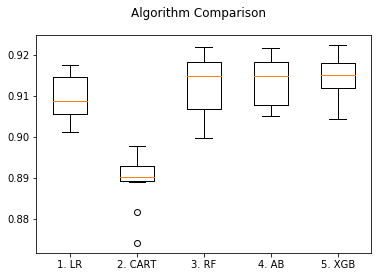

In [30]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Make Predictions on Validation Set:



The XGB model was the most accurate model that we tested. Now we want to get an idea of accuracy of the model on our validation set. This will give us an independent final check on the accuracy of th best model.

We can run the XGB model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.





In [31]:
# Select best model
# Make predictions on validation dataset
xgb = XGBClassifier()
fit = xgb.fit(X_train, y_train)
xgb.pred = xgb.predict(X_validation)
print("Accuracy Score: ",accuracy_score(y_validation, xgb.pred))
print("----------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_validation, xgb.pred))
print("----------------------------------------------------------")
print("Classification Report: \n",classification_report(y_validation, xgb.pred))

Accuracy Score:  0.9184268026219956
----------------------------------------------------------
Confusion Matrix: 
 [[10615   350]
 [  658   734]]
----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.68      0.53      0.59      1392

   micro avg       0.92      0.92      0.92     12357
   macro avg       0.81      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



####  Model Tuning: 

In [33]:
!pip install graphviz

In [35]:
from xgboost.sklearn import XGBClassifier
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

# fit model
model = XGBClassifier(seed = 123)
model.fit(X_train, y_train)

# printing the model for visualization
print(model)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=None,
       subsample=1, verbosity=1)


### Parameter Tuning:

In [38]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Tune objective
param_set0 = {
    'objective': ('reg:linear', 'binary:logistic','count:poisson')
}

xgb0 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=123)

gsearch0 = GridSearchCV(estimator=xgb0, param_grid=param_set0, scoring='roc_auc', n_jobs=4, cv=5) #verbose=2
gsearch0.fit(X_train, y_train)
print(gsearch0.cv_results_)
print("----------------------------------------------------")


{'mean_fit_time': array([8.62590561, 8.55667553, 8.93888726]), 'std_fit_time': array([0.0833693 , 0.08577786, 0.05231938]), 'mean_score_time': array([0.04717612, 0.04813294, 0.04843526]), 'std_score_time': array([0.00137995, 0.00235028, 0.00165646]), 'param_objective': masked_array(data=['reg:linear', 'binary:logistic', 'count:poisson'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'objective': 'reg:linear'}, {'objective': 'binary:logistic'}, {'objective': 'count:poisson'}], 'split0_test_score': array([0.94737647, 0.94696352, 0.94366305]), 'split1_test_score': array([0.94646082, 0.94452804, 0.94117797]), 'split2_test_score': array([0.94367012, 0.94108101, 0.93618121]), 'split3_test_score': array([0.94257027, 0.94156208, 0.93682814]), 'split4_test_score': array([0.94315275, 0.94360241, 0.93923457]), 'mean_test_score': array([0.94464633, 0.94354755, 0.93941718]), 'std_test_score': array([0.00190998, 0.00212889, 0.00276907]), 'rank

In [47]:
# Tune max_depth and min_child_weight

param_test1 = {
    'max_depth': [3,4,5,6,7,8,9],
    'min_child_weight': [2,3,4,5,6,7]
}

xgb1 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear')
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring = 'roc_auc', n_jobs = 4, 
                        iid = False, cv = 5)
gsearch1.fit(X_train,y_train)

print(gsearch1.cv_results_)
print("----------------------------------------------------")


{'mean_fit_time': array([ 8.77396464,  8.43582973,  8.54549284,  8.70767937,  8.80262375,
        8.69096794, 10.72759461, 10.36860304, 10.82988844, 10.77544198,
       10.65311375, 10.88728647, 12.67296362, 12.65278068, 12.501085  ,
       12.63317785, 12.20717812, 12.18108315, 14.58736987, 14.68252864,
       14.42048559, 14.61298351, 14.58635678, 14.93660598, 16.85629539,
       16.50744381, 16.55961342, 16.41415834, 16.61527066, 16.59930348,
       19.06946168, 18.73354259, 18.72301974, 18.77359104, 18.54600077,
       18.71179905, 21.20293922, 20.38028293, 20.09909878, 20.15960793,
       19.94792137, 20.59962473]), 'std_fit_time': array([0.23477043, 0.05950487, 0.06206892, 0.08145983, 0.15728802,
       0.24794555, 0.05363619, 0.20214987, 0.20123698, 0.14053032,
       0.10105363, 0.34647702, 0.14961853, 0.08751632, 0.14140507,
       0.13274506, 0.18392775, 0.08812771, 0.18908338, 0.05549451,
       0.17275499, 0.12706477, 0.14948125, 0.27721488, 0.15791342,
       0.31020043, 0

In [52]:
# Tune gamma
param_test2 = {
    'gamma':[i/10.0 for i in range(1,10,1)]
}

xgb2 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear', 
                     max_depth=5, min_child_weight=3)
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = param_test2, scoring = 'roc_auc',n_jobs = 4,
                         iid = False, cv = 5)
gsearch2.fit(X_train,y_train)

print(gsearch2.cv_results_)


{'mean_fit_time': array([12.24665637, 12.09508066, 12.28616142, 12.67343893, 12.47232723,
       12.54844108, 12.17669902, 11.98130703, 12.50352287]), 'std_fit_time': array([0.1747041 , 0.17763301, 0.24520567, 0.12546382, 0.15124505,
       0.33984289, 0.31888892, 0.24120873, 0.1561917 ]), 'mean_score_time': array([0.06376314, 0.05993171, 0.06274967, 0.0596704 , 0.05405402,
       0.04772973, 0.05177107, 0.04310808, 0.04654903]), 'std_score_time': array([0.00362494, 0.00773095, 0.00661086, 0.00317198, 0.00626505,
       0.00578767, 0.00929887, 0.00404828, 0.00141067]), 'param_gamma': masked_array(data=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.1}, {'gamma': 0.2}, {'gamma': 0.3}, {'gamma': 0.4}, {'gamma': 0.5}, {'gamma': 0.6}, {'gamma': 0.7}, {'gamma': 0.8}, {'gamma': 0.9}], 'split0_test_score': array([0.951421

In [53]:
# Tune reg_alpha and reg_lambda
param_test3 = {
    'reg_alpha': (0,2,4),
    'reg_lambda': (1,3,5)
}

xgb3 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear', 
                     max_depth=5, min_child_weight=3, gamma=0.1)
gsearch3 = GridSearchCV(estimator = xgb3, param_grid = param_test3, scoring = 'roc_auc',n_jobs = 4,
                         iid = False, cv = 5)
gsearch3.fit(X_train,y_train)

print(gsearch3.cv_results_)

{'mean_fit_time': array([12.37449393, 12.66350369, 12.58030443, 12.71971736, 12.63979979,
       12.79279323, 12.63089828, 12.42377672, 12.4688179 ]), 'std_fit_time': array([0.11964427, 0.15060246, 0.27050999, 0.15161942, 0.05201932,
       0.04178882, 0.21803865, 0.12791511, 0.17208523]), 'mean_score_time': array([0.06470909, 0.0671042 , 0.06862907, 0.06887889, 0.07041287,
       0.06961455, 0.06844511, 0.07281556, 0.06924682]), 'std_score_time': array([0.01016616, 0.0074584 , 0.00205152, 0.00215981, 0.00135367,
       0.00203435, 0.00242428, 0.00390691, 0.00348482]), 'param_reg_alpha': masked_array(data=[0, 0, 0, 2, 2, 2, 4, 4, 4],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_reg_lambda': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dt

In [54]:
# Tune subsample, colsample_bytree and colsample_bylevel
param_test4 = {
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1),
    'colsample_bylevel': (0.5, 1)
}

xgb4 = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear', 
                     max_depth=5, min_child_weight=3, gamma=0.1, reg_alpha=2, reg_lambda=5)
gsearch4 = GridSearchCV(estimator = xgb4, param_grid = param_test4, scoring = 'roc_auc',n_jobs = 4,
                         iid = False, cv = 5)
gsearch4.fit(X_train,y_train)

print(gsearch4.cv_results_)

{'mean_fit_time': array([ 7.44289103,  6.45656071,  9.96764674,  8.11350517,  9.13836932,
        7.78580518, 16.43004804, 14.03326221]), 'std_fit_time': array([0.09864985, 0.14621803, 0.15605082, 0.1449472 , 0.14838586,
       0.14543749, 0.99849858, 0.63955741]), 'mean_score_time': array([0.07026501, 0.06958675, 0.06672072, 0.06753035, 0.06517291,
       0.07361674, 0.07705169, 0.07704139]), 'std_score_time': array([0.0037472 , 0.00372233, 0.00356785, 0.00620985, 0.00553672,
       0.01010769, 0.00322709, 0.00561406]), 'param_colsample_bylevel': masked_array(data=[0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[0.5, 0.5, 1, 1, 0.5, 0.5, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.5, 1, 0.5, 1, 0.5, 1, 0.

### Make predictions on the validation set based on tuned model:

The XGB model was the most accurate model that we tested. Now we want to get an idea of accuracy of the model on our validation set. This will give us an independent final check on the accuracy of th best model.

We can run the XGB model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.


In [57]:
# Select best model
# Make predictions on validation dataset using tuned parameters
tuned_model = XGBClassifier(silent=True, nthread=-1, max_delta_step=0.7, seed=0, objective='reg:linear', 
                     max_depth=5, min_child_weight=3, gamma=0.1, reg_alpha=2, reg_lambda=5, subsample=1, 
                            colsample_bytree=1, colsample_bylevel=1)
tuned_fit = tuned_model.fit(X_train, y_train)
tuned_pred = tuned_model.predict(X_validation)

print("Accuracy Score: ",accuracy_score(y_validation, tuned_pred))
print("----------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_validation, tuned_pred))
print("----------------------------------------------------------")
print("Classification Report: \n",classification_report(y_validation, tuned_pred))


Accuracy Score:  0.9202880958161366
----------------------------------------------------------
Confusion Matrix: 
 [[10615   350]
 [  635   757]]
----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     10965
           1       0.68      0.54      0.61      1392

   micro avg       0.92      0.92      0.92     12357
   macro avg       0.81      0.76      0.78     12357
weighted avg       0.91      0.92      0.92     12357

